In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
df = df.drop(labels='id', axis='columns')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df.Sex.value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

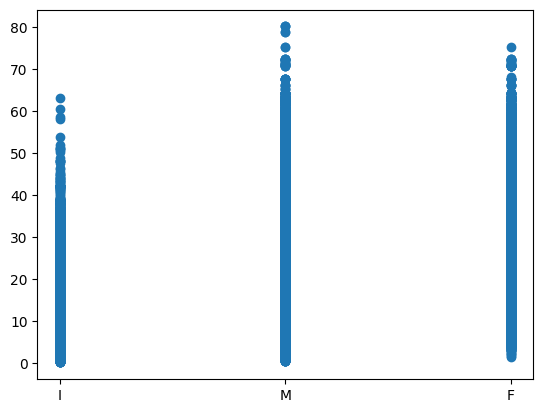

In [6]:
plt.scatter(df['Sex'], df['Weight'])
plt.show()

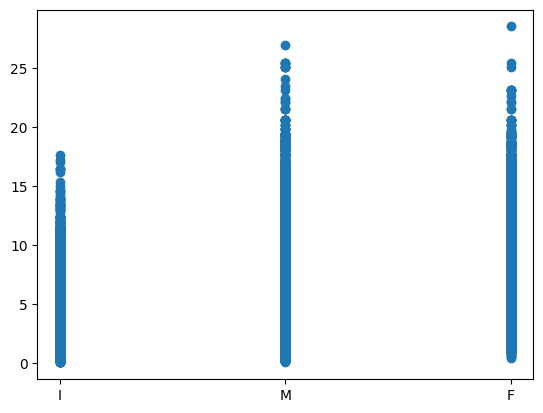

In [7]:
plt.scatter(df['Sex'], df['Shell Weight'])
plt.show()

In [9]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [15]:
gender_map = {
    'I': 1,
    'F': 2,
    'M': 3,
}

df['Sex'] = [gender_map[t] for t in df['Sex']]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Age'], test_size=0.2, random_state=42)

In [17]:
X_train, y_train

(       Sex  Length  Diameter  Height     Weight  Shucked Weight  \
 20612    3  1.6125    1.1500  0.4000  31.269499       15.252031   
 2935     2  1.5250    1.1750  0.4125  30.220567       12.232809   
 73847    3  1.5000    1.1625  0.3875  29.114936       13.125818   
 46445    3  1.1250    0.8875  0.2375  12.998246        5.499803   
 66755    1  0.8625    0.6375  0.1875   4.280774        1.644271   
 ...    ...     ...       ...     ...        ...             ...   
 37194    1  0.7000    0.5250  0.2000   2.041164        0.935534   
 6265     2  1.6500    1.2750  0.5250  39.859397       17.605040   
 54886    3  1.6750    1.3500  0.4375  42.013959       20.950281   
 860      3  1.5000    1.1750  0.4375  37.747359       12.190285   
 15795    1  0.4375    0.3375  0.2375   0.864660        0.311845   
 
        Viscera Weight  Shell Weight  
 20612        6.265239      7.059025  
 2935         7.002326      8.930093  
 73847        6.166016      8.079607  
 46445        2.891649    

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

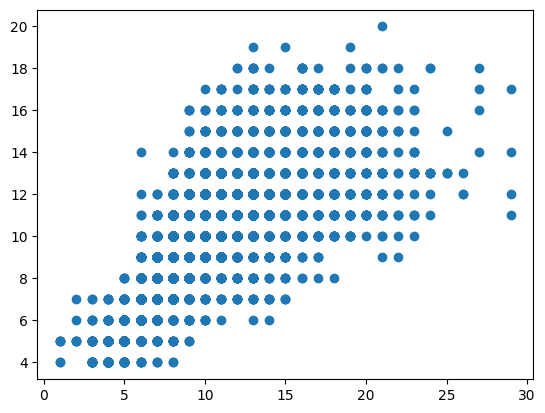

In [25]:
from sklearn import metrics

y_pred = np.rint(y_pred)
plt.scatter(y_test, y_pred)
plt.show()

In [29]:
error = metrics.mean_absolute_percentage_error(y_test, y_pred)
error

0.13718650748115288